# Genetic Algorithm
### 2017320114_최재원

In [116]:
import matplotlib.pyplot as plt
import numpy as np
import random
import copy
import datetime

## 과제: 유전자 알고리즘을 사용하여 4지선다형 영어시험 10 문제의 정답을 알아내기   
**조건**:  
1. 10 문제의 정답은 임의로 정해졌다.  
2. Population은 10개로 유지한다.  
3. Crossover - single point crossover를 사용한다.  

## Strategy Used
1. Proportianate Selection
2. Tournament Selection
3. Single-pont crossover
4. Swap mutation

## Parameter Change
1. Mutation rate

## Proportianate Selection

In [128]:
def proportionate_selection(parent_list):
    child_list = []
    fitness_percent_list = []
    fitness_accum_list = []
    fitness_sum = 0
    for parent in parent_list:
        fitness_sum += parent.Fitness

    for parent in parent_list:
        fitness_percent_list.append(parent.Fitness / fitness_sum)

    fitness_sum = 0
    for fitness_percent in fitness_percent_list:
        fitness_sum += fitness_percent
        fitness_accum_list.append(fitness_sum)

    for i in range(0, 10):
        rand = random.random()
        before = 0
        for j in range(0, len(fitness_accum_list)):
            if rand > before and rand <= fitness_accum_list[j]:
                child_list.append(copy.deepcopy(parent_list[j]))
                break
            before = fitness_accum_list[j]
    return child_list

## Tournament Selection

In [129]:
def tournament_selection(parent_list, k):
    child_list = []
    for i in range(0, 10):
        sample_index = random.sample(range(0,10), k)
        max_fitness = 0
        max_index = sample_index[0]
        for j in sample_index:
            if parent_list[j].Fitness > max_fitness:
                max_fitness = parent_list[j].Fitness
                max_index = j
        winner_chromosome = parent_list[max_index]
        child_list.append(copy.deepcopy(winner_chromosome))
    return child_list

## Parent to Child | Selection, Crossover, Mutation

In [130]:
def _parent(length, geneSet, get_fitness): # 10개
    chromosome_list = []
    average = 0
    for i in range(0, 10): # 10개까지
        genes = []
        while len(genes) < length:
            sampleSize = min(length - len(genes), len(geneSet))
            genes.extend(random.sample(geneSet, sampleSize))
        fitness = get_fitness(genes)
        average += fitness
        chromosome_list.append(Chromosome(genes, fitness))
    return chromosome_list, average/length

def _mutation(parent, geneSet, get_fitness):
    childGenes = parent.Genes[:]
    index = random.randrange(0, len(parent.Genes))
    newGene, alternate = random.sample(geneSet, 2)
    childGenes[index] = alternate if newGene == childGenes[index] else newGene
    fitness = get_fitness(childGenes)
    return Chromosome(childGenes, fitness)

In [131]:
def _child(parent_list, geneSet, get_fitness, select_type, k=3):
    child_list = []

    if select_type == 'proportionate': # proportionate Selection
        child_list = proportionate_selection(parent_list)
    elif select_type == 'tournament': # tournament Selection
        child_list = tournament_selection(parent_list, k)
    else:
        print("Invalid Select Type!")
        return []

    crossover_rate = 0.2 #Crossover
    crossover_point = 5
    selected = None
    for i in range(0, len(child_list)):
        rand = random.random()
        if rand < crossover_rate:
            if selected is None:
                selected = i
            else:
                child_list[selected].Genes[crossover_point:], child_list[i].Genes[crossover_point:] = child_list[i].Genes[crossover_point:], child_list[selected].Genes[crossover_point:]
                selected = None

        child_list[i].Fitness = get_fitness(child_list[i].Genes)

    mutation_rate = 0.2 # mutation
    for i in range(0, len(child_list)):
        rand = random.random()
        if rand < mutation_rate:
            child = _mutation(child_list[i], geneSet, get_fitness)
            del child_list[i]
            child_list.append(child)
    return child_list

def get_answer(get_fitness, targetLen, optimalFitness, geneSet, display, select_type):
    random.seed()

    gen_count = 0
    maximum_average = 0
    avg_fitness_hist = []

    bestParentList, average = _parent(targetLen, geneSet, get_fitness) # 최초 generation, 그리고 그것들의 각각의 fitness 값
    avg_fitness_hist.append(average)
    print("Generation : {},\t Average_Fitness: {}".format(gen_count, average))
    display(bestParentList)

    while True:
        gen_count += 1
        child_list = _child(bestParentList, geneSet, get_fitness, select_type)

        fitness_sum = 0
        for child in child_list:
            fitness_sum += child.Fitness

        average = fitness_sum / 10
        avg_fitness_hist.append(average)
        print("Generation : {}, Average_Fitness: {}".format(gen_count, average))
        if average > maximum_average:
            bestParentList = child_list
            maximum_average = average

        if average >= optimalFitness:
            return child_list, avg_fitness_hist


In [132]:
def answer(length, okay):
    if okay is True or length > 4:
        return ''.join(random.choice("1234") for _ in range(length))

    answer_list = []
    num = random.randrange(1, 4)
    for i in range(length):
        while str(num) in answer_list:
            num = random.randrange(1, 4)
        answer_list.append(str(num))
    
    target = ''.join(answer_list)
    print("Target Answer: {}".format(target))

    return target

def test(target, select_type):
    geneset = "1234"
    startTime = datetime.datetime.now()

    def fnGetFitness(genes):
        return get_fitness(genes, target)

    def fnDisplay(candidate_list):
        display_list(candidate_list, target, startTime)

    optimalFitness = len(target) * 1
    child_list, avg_fitness_hist = get_answer(fnGetFitness, len(target), optimalFitness, geneset, fnDisplay, select_type)

    print("{} Selection, time: {}".format(select_type, datetime.datetime.now() - startTime))
    return avg_fitness_hist

In [133]:
class Chromosome:
    def __init__(self, genes, fitness):
        self.Genes = genes
        self.Fitness = fitness

def get_fitness(guess, target):
    fitness = 0
    for expected, actual in zip(target, guess):
        if expected == actual:
            fitness += 1
    return fitness

In [134]:
def display(candidate, target, startTime):
    timeDiff = datetime.datetime.now() - startTime
    print("{}\t{}\t\t{}".format(''.join(candidate.Genes),candidate.Fitness,timeDiff))

def display_list(candidate_list, target, startTime):
    fitness_sum = 0
    print("{}\t\t{}\t\t{}".format('Answer', 'Fitness','Time'))
    for candidate in candidate_list:
        display(candidate, target, startTime)
        fitness_sum += candidate.Fitness


Generation : 0,	 Average_Fitness: 1.7
Answer		Fitness		Time
1234312424	2		0:00:00.000660
2134421324	2		0:00:00.000705
4132324141	1		0:00:00.000737
1432321421	0		0:00:00.000797
4213234123	4		0:00:00.000947
1324341241	1		0:00:00.000993
2431321424	1		0:00:00.001026
3412214324	3		0:00:00.001056
3421142314	1		0:00:00.001148
3142134234	2		0:00:00.001194
Generation : 1, Average_Fitness: 2.6
Generation : 2, Average_Fitness: 3.0
Generation : 3, Average_Fitness: 3.1
Generation : 4, Average_Fitness: 4.3
Generation : 5, Average_Fitness: 4.3
Generation : 6, Average_Fitness: 4.4
Generation : 7, Average_Fitness: 4.4
Generation : 8, Average_Fitness: 4.1
Generation : 9, Average_Fitness: 4.1
Generation : 10, Average_Fitness: 4.3
Generation : 11, Average_Fitness: 4.6
Generation : 12, Average_Fitness: 5.0
Generation : 13, Average_Fitness: 5.5
Generation : 14, Average_Fitness: 5.3
Generation : 15, Average_Fitness: 5.5
Generation : 16, Average_Fitness: 5.3
Generation : 17, Average_Fitness: 5.2
Generation : 

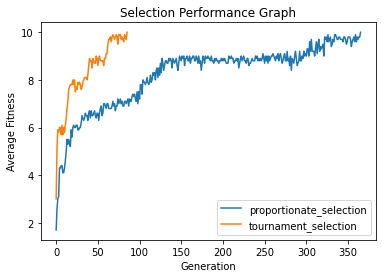

In [137]:
def plot_result(values, title, legend, xlabel, ylabel):
    for value in values:
        plt.plot(range(0,len(value)), value)
    plt.title(title)
    plt.legend(legend)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


if __name__ == '__main__':
    target = answer(10, True)

    proportionate_fit_hist = test(target,'proportionate')
    tournament_fit_hist = test(target, 'tournament')

    plot_result(
         [proportionate_fit_hist,tournament_fit_hist],
         'Selection Performance Graph',
         ['proportionate_selection','tournament_selection'],
         'Generation',
         'Average Fitness')